# Distribution Center Location Problem

A company wants to build a few distribution centers to serve five markets. There are five candidate centers. Each market has its own demand, and each distribution center (once open) has its operating cost and capacity. There is also a shipping cost from each facility to each market. The goal is to choose one or multiple locations to build distribution centers, satisfy all demands, and minimize the total cost.


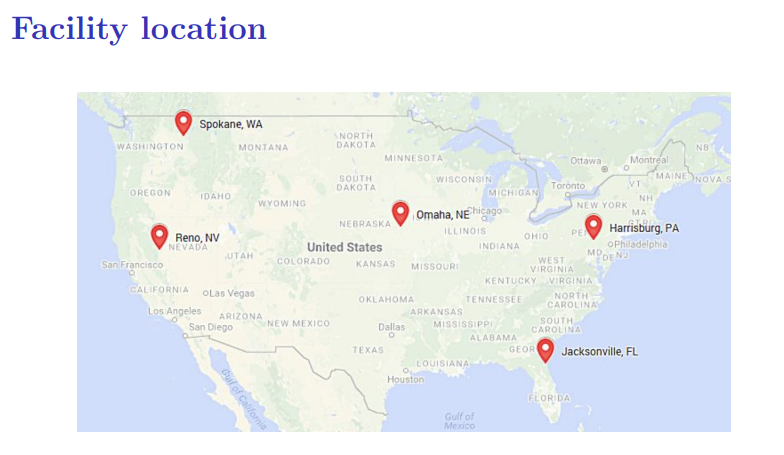

Let's define the following variables:

For each distribution center j:
- $f_j$: Weekly operating cost of distribution center j.
- $K_j$: Capacity of distribution center j.
- $x_j$: Decision variable - 1 if a distribution center is built at location j, 0 otherwise.

For each market i and distribution center j:
- $c_{ij}$: Shipping cost per book from distribution center j to market i.
- $y_{ij}$: Number of books shipped from distribution center j to market i.

The objective is to minimize the total cost.

The mathematical formulation for this problem can be written as follows, where i and j start from 1 and end at 5:

**Objective Function**:
Minimize $ \sum_{j=1}^{5} f_j x_j + \sum_{i=1}^{5} \sum_{j=1}^{5} c_{ij} y_{ij} $

**Subject to the constraints**:
1. Demand satisfaction for each market i:
   $ \sum_{j=1}^{5} y_{ij} = D_i $ for i = 1 to 5, where $D_i$ is the book demand of region i.

2. Capacity constraint for each distribution center j:
   $ \sum_{i=1}^{5} y_{ij} \leq K_j $ for j = 1 to 5, where $K_j$ is the capacity of distribution center j.

3. Binary decision variable for distribution center location:
   $ x_j \in \{0, 1\} $ for j = 1 to 5.

4. Non-negativity constraints for shipping variables:
   $ y_{ij} \geq 0 $ for i = 1 to 5 and j = 1 to 5.

5. Non-negativity constraints for decision variables:
   $ x_j \geq 0 $ for j = 1 to 5.


In [1]:
from gurobipy import * 
import pandas as pd

In [2]:
data= pd.read_excel("IP_dataset.xlsx")

In [3]:
basic_info = pd.read_excel("IP_dataset.xlsx", sheet_name="Basic information")

In [4]:
cities = range(len(basic_info['City']))
market = range(len(basic_info['Market']))

In [5]:
city_info = pd.read_excel("IP_dataset.xlsx", sheet_name="City's information")

In [6]:
operating_cost = city_info['Operating cost']
capacity = city_info['Capacity']

In [7]:
market_info = pd.read_excel("IP_dataset.xlsx", sheet_name="Market's information")

In [8]:
demands = market_info['Demand']

In [9]:
shipping_info = pd.read_excel("IP_dataset.xlsx", sheet_name="Shipping cost" ,index_col=0)

In [10]:
print(shipping_info)

           Spokane, WA  Reno, NV  Omahe, NE  Harrisburg, PA  Jacksonville, FL
Northwest         2.40      3.25       4.05            5.25              6.95
Southwest         3.50      2.30       3.25            6.05              5.85
Midwest           4.80      3.40       2.85            4.30              4.80
Southeast         6.80      5.25       4.30            3.25              2.10
Northeast         5.75      6.00       4.75            2.75              3.50


In [11]:
shipping_cost = []

for i in shipping_info.index:
    shipping_cost.append(shipping_info.loc[i])

print(shipping_cost[0])

Spokane, WA         2.40
Reno, NV            3.25
Omahe, NE           4.05
Harrisburg, PA      5.25
Jacksonville, FL    6.95
Name: Northwest, dtype: float64


In [12]:
shipping_cost = []

for i in shipping_info.index:
    shipping_cost.append(shipping_info.loc[i])

print(shipping_cost)

[Spokane, WA         2.40
Reno, NV            3.25
Omahe, NE           4.05
Harrisburg, PA      5.25
Jacksonville, FL    6.95
Name: Northwest, dtype: float64, Spokane, WA         3.50
Reno, NV            2.30
Omahe, NE           3.25
Harrisburg, PA      6.05
Jacksonville, FL    5.85
Name: Southwest, dtype: float64, Spokane, WA         4.80
Reno, NV            3.40
Omahe, NE           2.85
Harrisburg, PA      4.30
Jacksonville, FL    4.80
Name: Midwest, dtype: float64, Spokane, WA         6.80
Reno, NV            5.25
Omahe, NE           4.30
Harrisburg, PA      3.25
Jacksonville, FL    2.10
Name: Southeast, dtype: float64, Spokane, WA         5.75
Reno, NV            6.00
Omahe, NE           4.75
Harrisburg, PA      2.75
Jacksonville, FL    3.50
Name: Northeast, dtype: float64]


In [13]:
# Gurobi model
model = Model("facility_location")
#adding variables for each city

x= []

for j in cities:
    x.append(model.addVar(lb = 0, ub = 1, vtype=GRB.BINARY, name="x"+str(j+1)))

Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-10


In [14]:
#variables for each market
y= []

for i in market:
    y.append([])
    for j in cities:
        y[i].append(model.addVar(lb = 0, vtype=GRB.CONTINUOUS, name="y"+str(i+1)+"_"+str(j+1)))

In [15]:
#upadating the model
model.update()

In [16]:
#getiing the variables
model.getVars()

[<gurobi.Var x1>,
 <gurobi.Var x2>,
 <gurobi.Var x3>,
 <gurobi.Var x4>,
 <gurobi.Var x5>,
 <gurobi.Var y1_1>,
 <gurobi.Var y1_2>,
 <gurobi.Var y1_3>,
 <gurobi.Var y1_4>,
 <gurobi.Var y1_5>,
 <gurobi.Var y2_1>,
 <gurobi.Var y2_2>,
 <gurobi.Var y2_3>,
 <gurobi.Var y2_4>,
 <gurobi.Var y2_5>,
 <gurobi.Var y3_1>,
 <gurobi.Var y3_2>,
 <gurobi.Var y3_3>,
 <gurobi.Var y3_4>,
 <gurobi.Var y3_5>,
 <gurobi.Var y4_1>,
 <gurobi.Var y4_2>,
 <gurobi.Var y4_3>,
 <gurobi.Var y4_4>,
 <gurobi.Var y4_5>,
 <gurobi.Var y5_1>,
 <gurobi.Var y5_2>,
 <gurobi.Var y5_3>,
 <gurobi.Var y5_4>,
 <gurobi.Var y5_5>]

In [17]:
print(x)

[<gurobi.Var x1>, <gurobi.Var x2>, <gurobi.Var x3>, <gurobi.Var x4>, <gurobi.Var x5>]


In [18]:
# setting the objective function
model.setObjective (
    quicksum (operating_cost [j] * x[j] for j in cities ) +
    quicksum (quicksum ( shipping_cost [i][j] * y[i][j]
    for j in cities ) for i in market ) , GRB.MINIMIZE )

In [19]:
print(model)

<gurobi.Model MIP instance facility_location: 0 constrs, 30 vars, Parameter changes: Username=(user-defined)>


In [20]:
model.getObjective()

<gurobi.LinExpr: 0.0>

In [21]:
#setting the demand constraints
model.addConstrs(
    quicksum (y[i][j] for j in cities) >= demands[i] for i in market)
    

#setting the capacity constraints
model.addConstrs(
    quicksum (y[i][j] for i in market) <= capacity[j]*x[j] for j in cities)


{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>}

In [22]:
model.update()

In [23]:
model.getConstrs()

[<gurobi.Constr R0>,
 <gurobi.Constr R1>,
 <gurobi.Constr R2>,
 <gurobi.Constr R3>,
 <gurobi.Constr R4>,
 <gurobi.Constr R5>,
 <gurobi.Constr R6>,
 <gurobi.Constr R7>,
 <gurobi.Constr R8>,
 <gurobi.Constr R9>]

In [24]:
model.optimize()

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-10510U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 10 rows, 30 columns and 55 nonzeros
Model fingerprint: 0x74fa282d
Variable types: 25 continuous, 5 integer (5 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+04]
  Objective range  [2e+00, 4e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [8e+03, 2e+04]
Presolve time: 0.02s
Presolved: 10 rows, 30 columns, 55 nonzeros
Variable types: 25 continuous, 5 integer (5 binary)
Found heuristic solution: objective 313600.00000

Root relaxation: objective 2.528000e+05, 11 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 252800.000    0    5 313600.000 252800.000  19.4%     -    0

In [25]:
model.write("facility_location.lp")

In [26]:
#getting the solution
print(model)

<gurobi.Model MIP instance facility_location: 10 constrs, 30 vars, Parameter changes: Username=(user-defined)>


In [27]:
#printing the solution
for v in model.getVars():
    print(v.varName, v.x)

x1 0.0
x2 1.0
x3 0.0
x4 1.0
x5 1.0
y1_1 0.0
y1_2 8000.0
y1_3 0.0
y1_4 0.0
y1_5 0.0
y2_1 0.0
y2_2 12000.0
y2_3 0.0
y2_4 0.0
y2_5 0.0
y3_1 0.0
y3_2 0.0
y3_3 0.0
y3_4 8000.0
y3_5 1000.0
y4_1 0.0
y4_2 0.0
y4_3 0.0
y4_4 0.0
y4_5 14000.0
y5_1 0.0
y5_2 0.0
y5_3 0.0
y5_4 17000.0
y5_5 0.0


In [28]:
# head of the result table
print ("\t Market1 \t Market2 \t Market3 \t Market4 \t Market5 ")

for j in cities:
# mark which product is printed now
    print ("\n")
    print ("City" + str(j +1),"\t", end =" ")
    for i in market:
        # print values of each kind of product
        if len (str(y[i][j].x)) < 7:
            print (y[i][j].x,"\t","\t",end =" ")
        else :
            print (y[i][j].x,"\t", end =" ")
print ("\nz* =", model . objVal ) # print objective value

	 Market1 	 Market2 	 Market3 	 Market4 	 Market5 


City1 	 0.0 	 	 0.0 	 	 0.0 	 	 0.0 	 	 0.0 	 	 

City2 	 8000.0 	 	 12000.0 	 0.0 	 	 0.0 	 	 0.0 	 	 

City3 	 0.0 	 	 0.0 	 	 0.0 	 	 0.0 	 	 0.0 	 	 

City4 	 0.0 	 	 0.0 	 	 8000.0 	 	 0.0 	 	 17000.0 	 

City5 	 0.0 	 	 0.0 	 	 1000.0 	 	 14000.0 	 0.0 	 	 
z* = 268950.0


In [29]:
# writing the model in a file
model.write("facility_location.lp")

In [30]:
#writing the solution in a file
model.write("facility_location.sol")